# Histopathologic Cancer Detection
## Springboard Data Science Track Capstone Project 1
## by Morgan Fry

In [2]:
#first include packages for image processing etc.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline

from matplotlib.image import imread
       
from skimage import data,filters
from PIL import Image                                                            
from glob import glob
import seaborn as sns
import os
from sklearn.utils import shuffle

In [5]:
#load the data 
#load a sample of the data
#pick 10000 from the training set at random
#1 df -- id,label,r,g,b

#load training labels
tr_data=pd.read_csv('train_labels.csv')
print(tr_data.head(8))

                                         id  label
0  f38a6374c348f90b587e046aac6079959adf3835      0
1  c18f2d887b7ae4f6742ee445113fa1aef383ed77      1
2  755db6279dae599ebb4d39a9123cce439965282d      0
3  bc3f0c64fb968ff4a8bd33af6971ecae77c75e08      0
4  068aba587a4950175d04c680d38943fd488d6a9d      0
5  acfe80838488fae3c89bd21ade75be5c34e66be7      0
6  a24ce148f6ffa7ef8eefb4efb12ebffe8dd700da      1
7  7f6ccae485af121e0b6ee733022e226ee6b0c65f      1


#### Let's plot a few images with and without cancer and do a cursory comparison

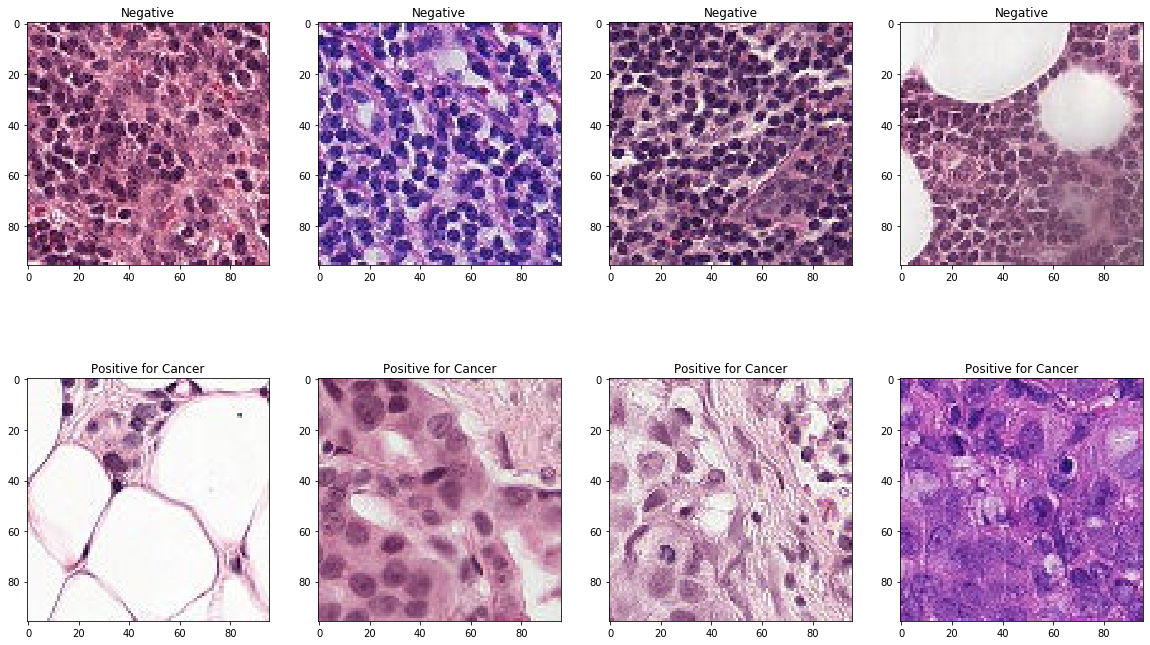

In [111]:
#select 8 at random
shuffled_tr_data=shuffle(tr_data)

fig,ax = plt.subplots(2,4, figsize=(20,12))
#4 negatives
for i, idx in enumerate(shuffled_tr_data[shuffled_tr_data['label'] == 0]['id'][:4]):
    path = os.path.join('train/',idx)
    ax[0,i].imshow(plt.imread(path+'.tif'))
    ax[0,i].set_title('Negative')

#4 positives
for i, idx in enumerate(shuffled_tr_data[shuffled_tr_data['label'] == 1]['id'][:4]):
    path = os.path.join('train/',idx)
    ax[1,i].imshow(plt.imread(path+'.tif'))
    ax[1,i].set_title('Positive for Cancer')


##### Looks like potentially hue and cell shape matter.

#### Let's take a sample of the data and see what we can see:

In [21]:
#load n images into dataframe
def load_imgs(n, df):
    """
    Loads n images, df training id/label dataframe and returns X,y data and labels.
    X is dataframe of numpy arrays of each image
    y is dataframe of labels
    """
    shuffled=shuffle(df)
    X=np.array(n,96,96,3)
    y-pd.DataFrame()
    for i in enumerate(shuffled[:n]):
        path = os.path.join('train/',shuffled['id'])
        X=X.append(imread(path+'.tif'))
        y[i]=shuffled['label']
    return X,y

In [22]:
#test load_imgs function
X=pd.DataFrame()
y=pd.DataFrame()
X,y = load_imgs(10,tr_data)

ValueError: only 2 non-keyword arguments accepted

In [3]:
#exploratory data analysis
#display a few pictures
#graph pixel color values distribution for positive and negative groups
#to see if there is any correlation
#which color value aggregators? mean, median, mode, sum?

#stain should stain only positive samples with certain color

In [ ]:
#load labels and training set
#and flatten into vector/matrix format